In [1]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns


sns.set_style("ticks")
fontpath = expanduser('LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': False
}
mpl.rcParams.update(params)

In [2]:
from datetime import datetime, timedelta
from os.path import expanduser
import pandas as pd
import numpy as np

cats = ["Alt-right", "Alt-lite", "I.D.W.", "Media"]
names = ["Alt-right", "Alt-lite", "IDW", "control"]
colors = {"Alt-right": "#f93e49", "Alt-lite": "#F29F05", "I.D.W.": "#019441", "Media": "#35598a"}
bins_like_name = ["0", "1", "2-5", "6-100", "100"]
x_label = ["0", "1", "2-5", "6-100", "100+"]
years = ["2016", "2017", "2018"]
lines = ['-', '--', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

In [3]:
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

# Polarity

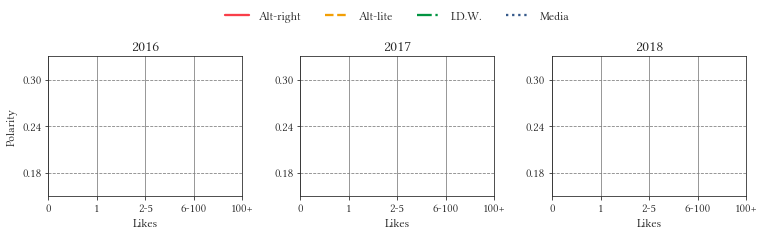

In [10]:
blob_df_path = df_path + "text_blob_df/like/"

fig = plt.figure(
    constrained_layout=False,
    figsize=(12.5, 2.5),
)
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3, hspace=0.25, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

axs = [ax1, ax2, ax3]

for ax, year in zip(axs, years):
    pol = {}

    for like_name in bins_like_name:
        pol[like_name] = []
        for name in names:
            pol[like_name].append(pd.read_csv(f"{blob_df_path}{name}{like_name}_pol.csv").iloc[int(year)-2016])
    
    for i in range(len(names)):
        y = []
        y_dyd = []
        y_dyu = []
        for like in bins_like_name:
            y.append(pol[like][i].y)
            y_dyd.append(pol[like][i]["dyd"])
            y_dyu.append(pol[like][i]["dyu"])

        ax.plot(x_label, y, lines[i], color=colors[cats[i]])
        ax.fill_between(x_label, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

    ax.set_title(year, fontsize=15)
    ax.set_xlim(0, 4)    
    ax.set_ylim(0.15, 0.33)
    ax.set_yticks([0.18, 0.24, 0.30])
    
# Adds legend on the top
leg = ax2.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.4),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=12)

for line in leg.get_lines():
    line.set_linewidth(2.3)
    
# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Polarity")
_ = ax1.set_xlabel("Likes")
_ = ax2.set_xlabel("Likes")
_ = ax3.set_xlabel("Likes")


# Save figs
plt.savefig(f"{img_path}textblob/like/polarity_likes.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}textblob/like/polarity_likes.png", bbox_inches = 'tight')


# Empath

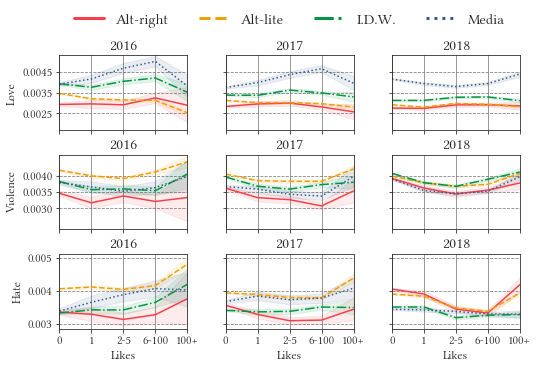

In [24]:
emotion_list = ['love', 'violence','hate']

empath = []
empath_df_path = df_path + "empath_df/like/"

fig = plt.figure(
    constrained_layout=False,
    figsize=(8.25, 4.9),
)
gs = fig.add_gridspec(nrows=3, ncols=3, wspace=0.3, hspace=0.33, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharey=ax2)
ax6 = fig.add_subplot(gs[2, 1], sharey=ax3)
ax7 = fig.add_subplot(gs[0, 2], sharey=ax1)
ax8 = fig.add_subplot(gs[1, 2], sharey=ax2)
ax9 = fig.add_subplot(gs[2, 2], sharey=ax3)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
axs_iter = iter(axs) 

perspective ={}
# Plots cdfs on the top plots
for year in range(len(years)):
    for like_name in bins_like_name:
        perspective[like_name] = []
        for name in names:
            perspective[like_name].append(pd.read_csv(f"{empath_df_path}{name}{like_name}_empath.csv").iloc[year])
    
    for emotion in emotion_list:
        ax = next(axs_iter)

        for i in range(len(names)):
            y = []
            y_dyd = []
            y_dyu = []
            for like in bins_like_name:
                y.append(perspective[like][i][emotion])
                y_dyd.append(perspective[like][i][emotion + "_dyd"])
                y_dyu.append(perspective[like][i][emotion + "_dyu"])

            ax.plot(x_label, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x_label, y_dyd,y_dyu, alpha=0.1,color=colors[cats[i]])

        ax.set_title(years[year], fontsize=15)
        ax.set_xlim(0, 4)        

ax1.set_ylim(0.0017, 0.0053)
ax1.set_yticks([0.0025, 0.0035, 0.0045])

ax2.set_ylim(0.00235, 0.00465)
ax2.set_yticks([0.0030, 0.0035, 0.0040])
        
# Adds legend on the top
leg = ax4.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.75),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)

c = 0
for ax in axs:
    c+=1
    if(c%3!=0):
        ax.xaxis.set_tick_params(labelbottom=False)
    if c>3:
        ax.yaxis.set_tick_params(labelbottom=False)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Love")
_ = ax2.set_ylabel("Violence")
_ = ax3.set_ylabel("Hate")
_ = ax3.set_xlabel("Likes")
_ = ax6.set_xlabel("Likes")
_ = ax9.set_xlabel("Likes")


# Saves figs
plt.savefig(f"{img_path}empath/like/empath_likes.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}empath/like/empath_likes.png", bbox_inches = 'tight')


# Empath Polarity

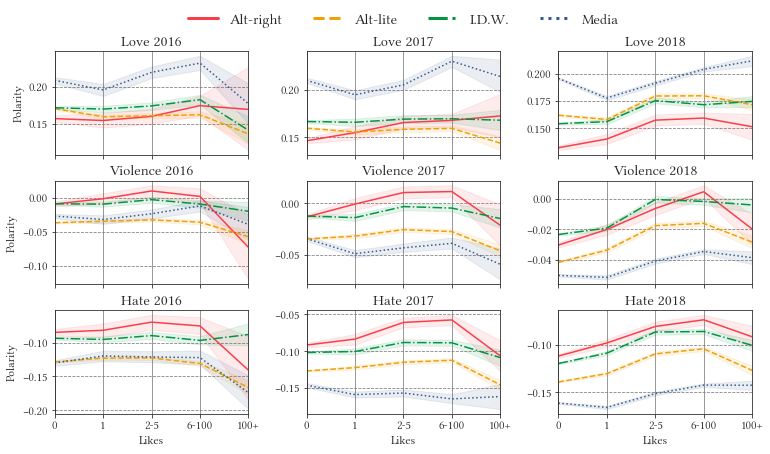

In [16]:
emotion_list = ['love', 'violence','hate']
y = []
emp_pol_df_path = df_path + "empath_blob_df/like/"

fig = plt.figure(
    constrained_layout=False,
    figsize=(12.5, 6.5),
)
gs = fig.add_gridspec(nrows=3, ncols=3, wspace=0.3, hspace=0.25, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[0, 1])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[2, 2])

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
axs_iter = iter(axs) 

# Plots cdfs on the top plots
for year in range(len(years)):
    for like_name in bins_like_name:
        perspective[like_name] = []
        for name in names:
            perspective[like_name].append(pd.read_csv(f"{emp_pol_df_path}{name}{like_name}_pol_empath_like.csv").iloc[year])

    for emotion in emotion_list:
        ax = next(axs_iter)

        for i in range(len(names)):
            y = []
            y_dyd = []
            y_dyu = []
            for like in bins_like_name:
                y.append(perspective[like][i][emotion])
                y_dyd.append(perspective[like][i][emotion + "_dyd"])
                y_dyu.append(perspective[like][i][emotion + "_dyu"])

            ax.plot(x_label, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x_label, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

        ax.set_title(emotion.capitalize() + " " + years[year], fontsize=15)
        ax.set_xlim(0, 4)        

# Adds legend on the top
leg = ax4.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.5),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)

c = 0
for ax in axs:
    c+=1
    if(c%3==0): continue
    ax.xaxis.set_tick_params(labelbottom=False)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Polarity")
_ = ax2.set_ylabel("Polarity")
_ = ax3.set_ylabel("Polarity")
_ = ax3.set_xlabel("Likes")
_ = ax6.set_xlabel("Likes")
_ = ax9.set_xlabel("Likes")


# Saves figs
plt.savefig(f"{img_path}empath_blob/like/empath_polarity_likes.pdf", bbox_inches = 'tight')
plt.savefig(f"{img_path}empath_blob/like/empath_polarity_likes.png", bbox_inches = 'tight')

# Perspective

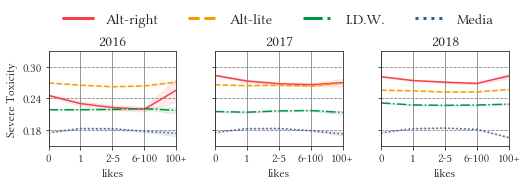

In [12]:
attributes = ['SEVERE_TOXICITY']
persp_df_path = df_path + "perspective_df/like/"
perspective = {}

fig = plt.figure(
    constrained_layout=False,
    figsize=(8.25, 1.7),
)
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)

axs = [ax1, ax2, ax3]

# Plots cdfs on the top plots
for ax, year in zip(axs, range(len(years))):
    for like_name in bins_like_name:
        perspective[like_name] = []
        for name in names:
            perspective[like_name].append(pd.read_csv(f"{persp_df_path}{name}{like_name}_perspective.csv").iloc[year])

    for emotion in attributes:
        for i in range(len(names)):
            y = []
            y_dyd = []
            y_dyu = []
            for like in bins_like_name:
                y.append(perspective[like][i][emotion])
                y_dyd.append(perspective[like][i][emotion + "_dyd"])
                y_dyu.append(perspective[like][i][emotion + "_dyu"])

            ax.plot(x_label, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x_label, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

    
    # Sets ticks, titles and limits
    ax.set_title(years[year], fontsize=15)
    ax.set_xlim(0, 4)
    ax.set_ylim(0.15, 0.33)
    ax.set_yticks([0.18, 0.24, 0.30])    
    
for ax in axs[1:]:
    ax.yaxis.set_tick_params(labelbottom=False)
    
# Adds legend on the top
leg = ax2.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.55),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Severe Toxicity")
_ = ax1.set_xlabel("likes")
_ = ax2.set_xlabel("likes")
_ = ax3.set_xlabel("likes")

# Saves figs
plt.savefig(f"{img_path}perspective/like/perspective_likes.pdf", bbox_inches = 'tight')       
plt.savefig(f"{img_path}perspective/like/perspective_likes.png", bbox_inches = 'tight')       
